In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


In [4]:
df = pd.read_csv("data/cleaned_data/df_tweets_cleaned.csv")

In [ ]:
df.to_csv()

In [16]:
def prepare_cv_data(df, col_name):        
    labels_specific = df[[col_name]].reset_index(drop = True)
    text = df[[col_name]].reset_index(drop = True)
    countVectorizer = CountVectorizer(max_features=5000, strip_accents="ascii") 
    countVector = countVectorizer.fit_transform(df[col_name])
    count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
    count_vect_df.head()
    return count_vect_df

In [17]:
count_vect_df = prepare_cv_data(df, "tweets_cleaned")

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
count_vect_df

,ability,abject,able,abnormal,abolished,abortion,abroad,absenteeism,absolute,absolutely,...,zmfvdqihbp,zmihvsubh,zmpnnhsu,zojqqydcu,zoqgoocy,zqixjkdh,zsuchbhb,zvjdexeuht,zxzopg,zzkulz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
def build_dt(count_vect_df, labels, col_name):
    X = count_vect_df
    y = labels
    print(X.shape, y.shape)

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 70% training and 30% test
    (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=10, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,                             
                            class_weight=None)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)


    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    dot_data = tree.export_graphviz(clf, out_file=None,
                ## The following creates TrainDF.columns for each
                ## which are the feature names.
                  feature_names=list(X.columns),  
                  #class_names=MyDT.class_names,  
                  filled=True, rounded=True,  
                  special_characters=True)                                    
    graph = graphviz.Source(dot_data) 
    ## Create dynamic graph name
    tempname=str("Graph_%s"%col_name)
    graph.render(tempname)
    
    labels = list(labels[col_name].value_counts().keys())
    print(labels)

    DT_pred=clf.predict(X_test)
    ## Show the confusion matrix
    bn_matrix = confusion_matrix(y_test, DT_pred)
    print(bn_matrix)
    classification_report_dt = classification_report(y_test, DT_pred, target_names=labels, digits=4, output_dict=True)
    fig = px.imshow(bn_matrix, 
                    labels=dict(x="Actuals", y="Predicted", color="Items Classified"),
                    x=labels,
                    y=labels,text_auto=True)
    fig.show()
    print(classification_report_dt)
    df = pd.DataFrame(classification_report_dt)
    df.iloc[:3, :5].T.plot(kind='bar')
    plt.show()
    fig2 = px.imshow(np.round(df.iloc[:3, :5].T,2),text_auto=True)
    fig2.show()
    FeatureImp=clf.feature_importances_   
    indices = np.argsort(FeatureImp)[::-1]
    ## print out the important features.....
    for f in range(X_train.shape[1]):
        if FeatureImp[indices[f]] > 0:
            print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
            #print ("feature name: ", feature_names[indices[f]])

    
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=["Importance"])    
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances = feat_importances.iloc[0:10,:]
    feat_importances.plot(kind='bar', figsize=(8,6))       

In [118]:
def build_nb(count_vect_df, labels, col_name):
    X = count_vect_df
    y = labels
    print(X.shape, y.shape)

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 70% training and 30% test
    labels = list(labels[col_name].value_counts().keys())
    print(labels)
    temp_train = pd.concat([X_train, y_train], axis = 1)
    temp_test = pd.concat([X_test, y_test], axis = 1)
    temp_train.to_csv("data/cleaned_data/train_nb.csv")
    temp_test.to_csv("data/cleaned_data/test_nb.csv")
    
    MyModelNB= MultinomialNB()

    NB1=MyModelNB.fit(X_train, y_train)
    Prediction1 = MyModelNB.predict(X_test)
    

    print("Accuracy:",metrics.accuracy_score(y_test, Prediction1))

    cnf_matrix4 = confusion_matrix(y_test, Prediction1)
    print(cnf_matrix4)
    fig = px.imshow(cnf_matrix4, 
                    labels=dict(x="Actuals", y="Predicted", color="Items Classified"),
                    x=labels,
                    y=labels,text_auto=True)
    fig.show()
    
    classification_report_nb = classification_report(y_test, Prediction1, target_names=labels, digits=4, output_dict=True)
    print(classification_report_nb)
    df = pd.DataFrame(classification_report_nb)
    df.iloc[:3, :5].T.plot(kind='bar')
    plt.show()
    fig2 = px.imshow(np.round(df.iloc[:3, :5].T,2),text_auto=True)
    fig2.show()

In [106]:
labels = df[["topic"]]

In [32]:
import plotly.express as px

(1573, 4035) (1573, 1)
Accuracy: 0.9698412698412698
['Obesity', 'Sugar tax', 'Soda tax', 'Sweetened beverage tax']
[[325   0   6   0]
 [  0  56   0   0]
 [  9   0 200   1]
 [  0   3   0  30]]


{'Obesity': {'precision': 0.9730538922155688, 'recall': 0.9818731117824774, 'f1-score': 0.9774436090225564, 'support': 331}, 'Sugar tax': {'precision': 0.9491525423728814, 'recall': 1.0, 'f1-score': 0.9739130434782608, 'support': 56}, 'Soda tax': {'precision': 0.970873786407767, 'recall': 0.9523809523809523, 'f1-score': 0.9615384615384616, 'support': 210}, 'Sweetened beverage tax': {'precision': 0.967741935483871, 'recall': 0.9090909090909091, 'f1-score': 0.9374999999999999, 'support': 33}, 'accuracy': 0.9698412698412698, 'macro avg': {'precision': 0.965205539120022, 'recall': 0.9608362433135846, 'f1-score': 0.9625987785098197, 'support': 630}, 'weighted avg': {'precision': 0.9699243804965612, 'recall': 0.9698412698412698, 'f1-score': 0.9697357808640091, 'support': 630}}


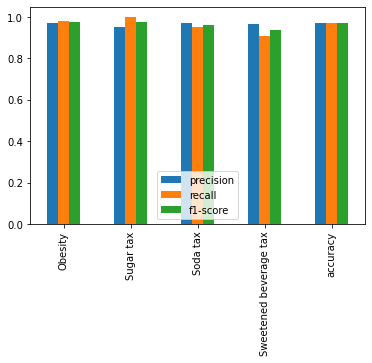

1. feature 3445 (0.475876)
2. feature 3280 (0.228603)
3. feature 3500 (0.185115)
4. feature 2405 (0.016129)
5. feature 775 (0.012630)
6. feature 3321 (0.009679)
7. feature 1772 (0.006618)
8. feature 3702 (0.006593)
9. feature 579 (0.006177)
10. feature 2725 (0.004750)
11. feature 1936 (0.004157)
12. feature 696 (0.003668)
13. feature 2706 (0.003438)
14. feature 1148 (0.003421)
15. feature 2205 (0.003407)
16. feature 1259 (0.003381)
17. feature 2502 (0.003370)
18. feature 3437 (0.003360)
19. feature 2484 (0.003348)
20. feature 750 (0.003330)
21. feature 1944 (0.003302)
22. feature 1503 (0.003213)
23. feature 842 (0.002980)
24. feature 1242 (0.002767)
25. feature 1700 (0.000689)


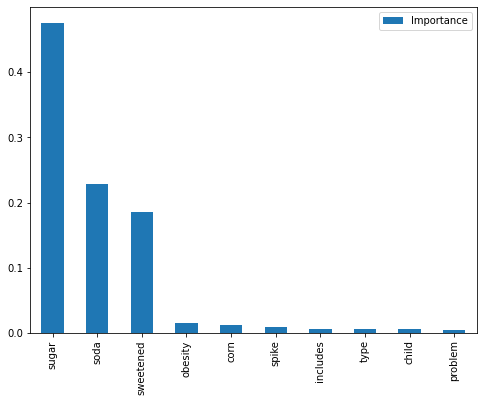

In [138]:
build_dt(count_vect_df, labels, "topic")

In [128]:
X_train

,ability,abject,able,abnormal,abortion,absenteeism,absolutely,abuse,abushamat,academic,...,younger,youre,yycfoqnbd,zaagqmi,zavwlzyinf,zero,zfrhyfuss,zojqqydcu,zqixjkdh,zzkulz
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1573, 4035) (1573, 1)
['Obesity', 'Sugar tax', 'Soda tax', 'Sweetened beverage tax']


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.9365079365079365
[[316   3  10   2]
 [  2  43  10   1]
 [  9   0 198   3]
 [  0   0   0  33]]


{'Obesity': {'precision': 0.9663608562691132, 'recall': 0.9546827794561934, 'f1-score': 0.9604863221884498, 'support': 331}, 'Sugar tax': {'precision': 0.9347826086956522, 'recall': 0.7678571428571429, 'f1-score': 0.8431372549019608, 'support': 56}, 'Soda tax': {'precision': 0.908256880733945, 'recall': 0.9428571428571428, 'f1-score': 0.9252336448598131, 'support': 210}, 'Sweetened beverage tax': {'precision': 0.8461538461538461, 'recall': 1.0, 'f1-score': 0.9166666666666666, 'support': 33}, 'accuracy': 0.9365079365079365, 'macro avg': {'precision': 0.9138885479631391, 'recall': 0.9163492662926198, 'f1-score': 0.9113809721542225, 'support': 630}, 'weighted avg': {'precision': 0.9378893514114894, 'recall': 0.9365079365079365, 'f1-score': 0.9360090862530912, 'support': 630}}


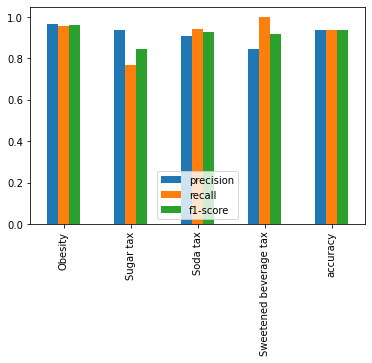

In [119]:
build_nb(count_vect_df, labels, "topic")

In [36]:
labels["topic"].value_counts()

Obesity                   788
Sugar tax                 538
Soda tax                  151
Sweetened beverage tax     96
Name: topic, dtype: int64

## SVM - 

#### For Sentiment Classification using Support Vector Machines, the following steps are followed - 
1. We create 4 separate datasets for each of the labels in the data namely - "Obesity", "Sugar Tax", "Soda Tax", "Sweetened beverage tax". 
2. For each dataset a labels are created using VADER from the nltk library. VADER stands for ‘Valence Aware Dictionary and sEntiment Reasoner’. (Note: in the spelling ‘sEntiment’, first letter ‘s’ is a small letter and second letter ‘E’ is capital and it is correct). VADER is a lexicon and rule-based sentiment analysis tool. It is used to analyze the sentiment of a text. Lexicon is a list of lexical features (words) that are labeled with positive or negative based on the semantic meaning. Even an unlabelled text data can be labeled with VADER sentiment analyzer.
3. This function takes in a sentence as the input and return a dictionary indicating the polarity scores for the sentence. It is to be noted that this function does not take a countvectorized dataframe. 
4. However, when we build an SVM model to perform sentiment classification, a countvectorized dataframe is given as the input. 
5. The SVM model will be trained to predict the sentiment based on the labels created by the VADER function. 

This was we can analyse the sentiment for each topic and understand if "Soda should be taxed or not"


### Step 1: Split datasets based on labels

In [37]:
obesity = df[df["topic"] == "Obesity"]
sugar_tax = df[df["topic"] == "Sugar tax"]
soda_tax = df[df["topic"] == "Soda tax"]
beverage_tax = df[df["topic"] == "Sweetened beverage tax"]

### Step 2: Label the datasets using VADER

In [42]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...


True

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

In [70]:
def get_scores(text):
    sent_dict = vds.polarity_scores(text)
    compound = sent_dict["compound"]
    if compound > 0.05:
        return "Pos"
    elif compound <= -0.05:
        return "Neg"
    else:
        return "Neu"
    return sentiment


In [67]:
from tqdm import tqdm
tqdm.pandas()

In [73]:
obesity["sentiment"] = obesity["tweets_cleaned"].progress_apply(lambda x: get_scores(x))
sugar_tax["sentiment"] = sugar_tax["tweets_cleaned"].progress_apply(lambda x: get_scores(x))
soda_tax["sentiment"] = soda_tax["tweets_cleaned"].progress_apply(lambda x: get_scores(x))
beverage_tax["sentiment"] = beverage_tax["tweets_cleaned"].progress_apply(lambda x: get_scores(x))

100%|██████████████████████████████████████████████████████████████████████████████| 788/788 [00:00<00:00, 3291.83it/s]
C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_4556\3242613569.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████████████████████████████████████████████████████████████████████████| 538/538 [00:00<00:00, 3292.07it/s]
C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_4556\3242613569.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|█████████████████████████████████████

### Step 3: Countvectorize the dataframes

In [82]:
obesity_count_vect_df = prepare_cv_data(obesity, "tweets_cleaned")
labels_obesity = obesity[["sentiment"]]

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [95]:
sugar_tax_count_vect_df = prepare_cv_data(sugar_tax, "tweets_cleaned")
labels_sugar_tax = sugar_tax[["sentiment"]]

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [96]:
soda_tax_count_vect_df = prepare_cv_data(soda_tax, "tweets_cleaned")
labels_soda_tax = soda_tax[["sentiment"]]

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [97]:
beverage_tax_count_vect_df = prepare_cv_data(beverage_tax, "tweets_cleaned")
labels_beverage_tax = beverage_tax[["sentiment"]]

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Step 4: Build the SVM

In [145]:
def svm_model(count_vect_df, labels_, col_name):
    X = count_vect_df
    y = labels_
    print(X.shape, y.shape)

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test
    (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    # Perform classification with SVM, kernel=linear
    classifier_linear = svm.SVC(kernel='rbf')
    classifier_linear.fit(X_train, y_train)
    prediction_linear = classifier_linear.predict(X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, prediction_linear))
    cnf_matrix4 = confusion_matrix(y_test, prediction_linear)
    labels = list(labels_[col_name].value_counts().keys())
    fig = px.imshow(cnf_matrix4, 
                    labels=dict(x="Actuals", y="Predicted", color="Items Classified"),
                    x=labels,
                    y=labels,text_auto=True)
    fig.show()
    classification_report_nb = classification_report(y_test, prediction_linear, target_names=labels, digits=4, output_dict=True)
    print(classification_report_nb)
    df = pd.DataFrame(classification_report_nb)
    df.iloc[:3, :3].T.plot(kind='bar')
    plt.show()
    fig2 = px.imshow(np.round(df.iloc[:3, :3].T,2),text_auto=True)
    fig2.show()

(788, 2603) (788, 1)


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.8037974683544303


{'Neg': {'precision': 0.8333333333333334, 'recall': 0.7971014492753623, 'f1-score': 0.8148148148148148, 'support': 69}, 'Pos': {'precision': 0.7380952380952381, 'recall': 0.8157894736842105, 'f1-score': 0.775, 'support': 38}, 'Neu': {'precision': 0.82, 'recall': 0.803921568627451, 'f1-score': 0.8118811881188118, 'support': 51}, 'accuracy': 0.8037974683544303, 'macro avg': {'precision': 0.7971428571428572, 'recall': 0.8056041638623412, 'f1-score': 0.8005653343112088, 'support': 158}, 'weighted avg': {'precision': 0.8061241711874624, 'recall': 0.8037974683544303, 'f1-score': 0.8042921697233014, 'support': 158}}


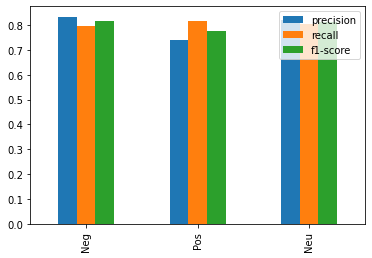

In [146]:
svm_model(obesity_count_vect_df, labels_obesity, "sentiment")

In [98]:
svm_model(sugar_tax_count_vect_df, labels_sugar_tax, "sentiment")

(538, 1765) (538, 1)
Accuracy: 0.7592592592592593


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [99]:
svm_model(soda_tax_count_vect_df, labels_soda_tax, "sentiment")

(151, 770) (151, 1)
Accuracy: 0.8709677419354839


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [100]:
svm_model(beverage_tax_count_vect_df, labels_beverage_tax, "sentiment")

(96, 402) (96, 1)
Accuracy: 0.65


C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

